**Exploratory Data Analysis and Visualization of COVID-19 India.**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
## This dataset captures the information as of 11th April 2019. 05:00 pm IST

age_groups=pd.read_csv('/kaggle/input/covid19-in-india/AgeGroupDetails.csv')

In [ ]:
print('People in India died due to COVID-19 as of 11th April 2019, 05:00 pm :',age_groups.TotalCases.sum())

In [ ]:
#Deaths are incorrectly mentioned as Total Cases
#renaming
age_groups['Deaths']=age_groups['TotalCases']

In [ ]:
#Dropping columns which are not requied.
age_groups=age_groups.drop(['Sno','TotalCases'],axis=1)

In [ ]:
age_groups

In [ ]:
#Data Cleaning
age_groups['Percentage']=age_groups['Percentage'].str.replace('%','')
age_groups['Percentage']=[float(x) for x in age_groups['Percentage'].values]

In [ ]:
#Visualization.
sns.barplot(x='AgeGroup',y='Deaths',data=age_groups)

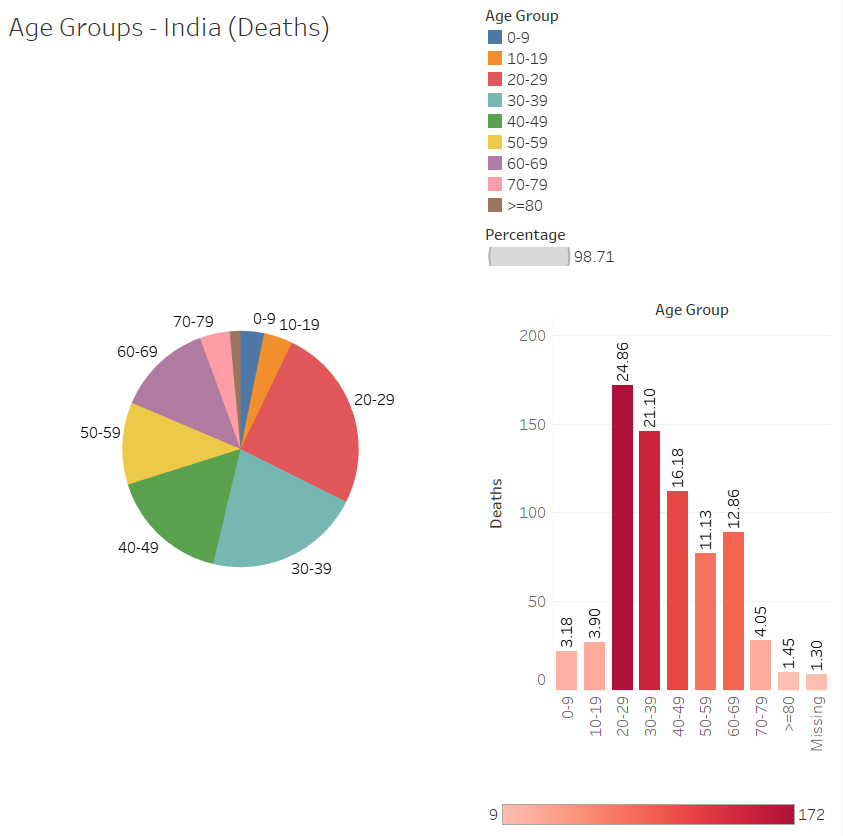

Inference: The most affected Age group in India is 20-29 followed by 30-39 years.

In [ ]:
#Statewise Testing
std=pd.read_csv('/kaggle/input/covid19-in-india/StatewiseTestingDetails.csv')
std=std.drop(['Date'],axis=1)

In [ ]:
x=std.groupby(['State'],as_index=False).max()
x['State / Union Territory']=x['State']
x=x.drop(['State'],axis=1)

In [ ]:
x.sort_values(by='Positive',ascending=False).head(5)

Inference: The top 5 states sorted by Positive cases.

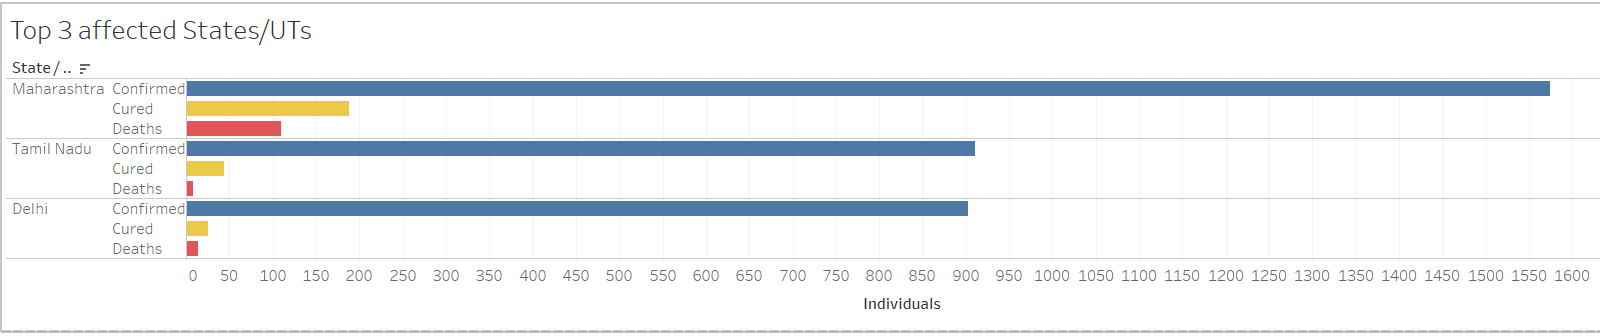

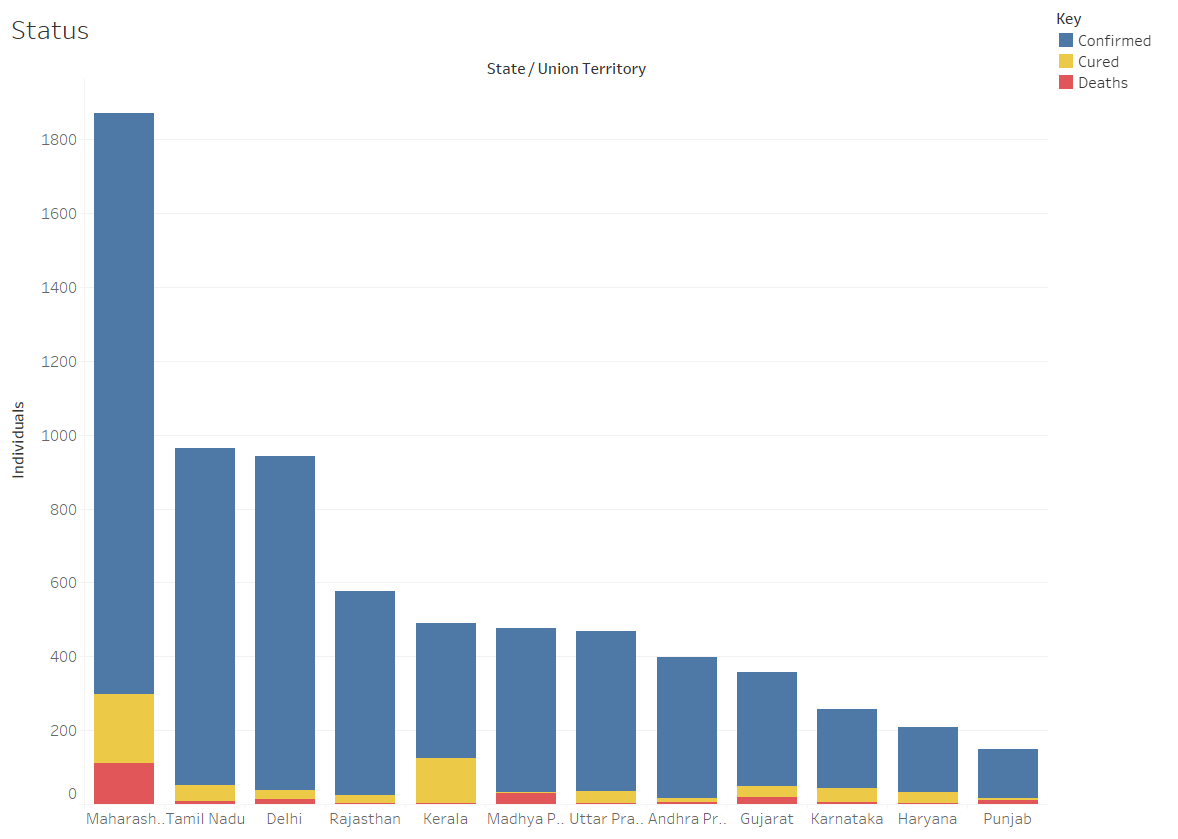

In [ ]:
pop=pd.read_csv('/kaggle/input/covid19-in-india/population_india_census2011.csv')
pop.head()

India expects 11% population growth from 2011 to 2020. (1.1% year on year.) Since, our data is of 2011 census, i have updated the population data with 11% growth.

https://www.macrotrends.net/countries/IND/india/population-growth-rate

In [ ]:
#adding 11% growth to population parameters.
pop['Population2020']=pop['Population']+pop['Population']*11/100
pop['Rural2020']=pop['Rural population']+pop['Rural population']*11/100
pop['Urban2020']=pop['Urban population']+pop['Urban population']*11/100


In [ ]:
pop['Area/km2']=pop['Area'].str.split(expand=True)[0]
pop['Density/km2']=pop['Density'].str.split('/',expand=True)[0]
pop=pop.drop(['Sno','Population','Rural population','Urban population','Gender Ratio','Area','Density'],axis=1)

In [ ]:
pop['Population2020']=[float(x) for x in pop['Population2020'].values]
pop['Rural2020']=[float(x) for x in pop['Rural2020'].values]
pop['Urban2020']=[float(x) for x in pop['Urban2020'].values]

In [ ]:
pop['Population2020'] = pop['Population2020'].apply(lambda x: '{:.2f}'.format(x))
pop['Rural2020'] = pop['Rural2020'].apply(lambda x: '{:.2f}'.format(x))
pop['Urban2020']= pop['Urban2020'].apply(lambda x: '{:.2f}'.format(x))

In [ ]:
pop.to_csv('pop.csv',index=False)

In [ ]:
pop.head()

The updated population data (forecast) for 2020 

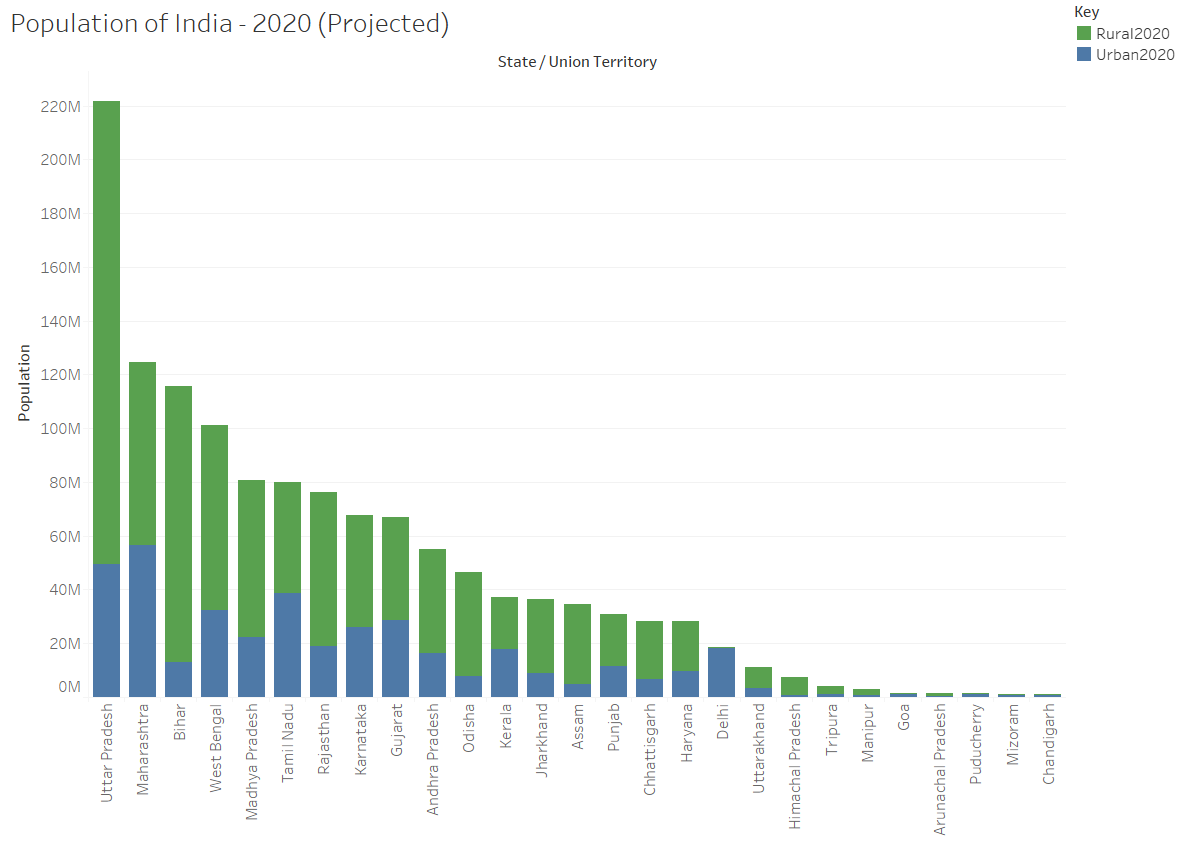

**COVID-19 INDIA**

In [ ]:
covid=pd.read_csv('/kaggle/input/covid19-in-india/covid_19_india.csv')
covid.head()

In [ ]:
y=covid.groupby(['State/UnionTerritory'],as_index=False)['Cured','Deaths','Confirmed'].max()
y['State / Union Territory']=y['State/UnionTerritory']
y=y.drop(['State/UnionTerritory'],axis=1)


Merging population data with Coronavirus situation. (name: master)

In [ ]:
master=pd.merge(pop,y,how='inner')
master=master.sort_values(by='Confirmed',ascending=False)
master.head()

Merging population data with COVID testing data

In [ ]:
master2=pd.merge(master,x)
master2.head()
master2=master2.drop(['Negative','Positive'],axis=1)

In [ ]:
master2=master2.sort_values(by='TotalSamples',ascending=False)
master2.head()

Hospital Beds

In [ ]:
beds=pd.read_csv('/kaggle/input/covid19-in-india/HospitalBedsIndia.csv')
beds.head()

In [ ]:
#dropping unnecessary columns as these data is captured in another column as sum.
beds=beds.drop(['NumPrimaryHealthCenters_HMIS','NumCommunityHealthCenters_HMIS','NumSubDistrictHospitals_HMIS','NumDistrictHospitals_HMIS'],axis=1)

In [ ]:
#Feature Engineering.
beds['TotalPublicHealthFacilities_NHP18']=beds['NumRuralHospitals_NHP18']+beds['NumUrbanHospitals_NHP18']
beds=beds.drop(['Sno','NumRuralHospitals_NHP18','NumUrbanHospitals_NHP18'],axis=1)
beds['TotalBeds_HMIS']=beds['NumPublicBeds_HMIS']
beds=beds.drop(['NumPublicBeds_HMIS'],axis=1)
beds['TotalBeds_NHP18']=beds['NumRuralBeds_NHP18']+beds['NumUrbanBeds_NHP18']
beds=beds.drop(['NumRuralBeds_NHP18','NumUrbanBeds_NHP18'],axis=1)

The data captured in hospital beds dataset is of 2 sources

1) HMIS - Hospital Management Information System

2) NHP18 - National Health Portal

In [ ]:
beds_hmis = beds[['State/UT','TotalPublicHealthFacilities_HMIS','TotalBeds_HMIS']]
beds_hmis=beds_hmis[:-1]
beds_hmis['State / Union Territory']=beds_hmis['State/UT']
beds_nhp18=beds[['State/UT','TotalPublicHealthFacilities_NHP18','TotalBeds_NHP18']]
beds_nhp18=beds_nhp18[:-1]
beds_nhp18['State / Union Territory']=beds_nhp18['State/UT']

In [ ]:
print(beds_nhp18.shape)


In [ ]:
print(beds_hmis.shape)

Have created 2 different files for each source

In [ ]:
hmis=pd.merge(master,beds_hmis,on='State / Union Territory')
hmis=hmis.drop(['State/UT'],axis=1)

In [ ]:
nhp18=pd.merge(master,beds_nhp18,on='State / Union Territory')
nhp18=nhp18.drop(['State/UT'],axis=1)

In [ ]:
hmis.head()

In [ ]:
nhp18.head()

The Hospital beds dataset is finally merged with Population and Covid situation in India data.